区间： 2025-05-06 → 2025-08-06
rho= 0.997636050248409
alpha= 0.9954240690502297


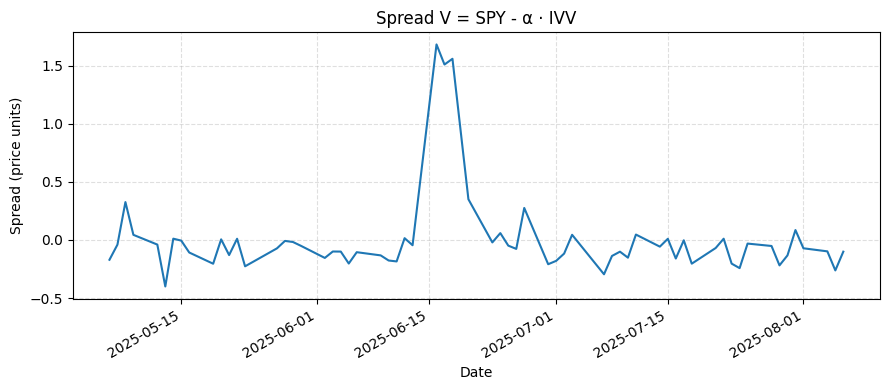

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
spy  = pd.read_csv("https://stooq.com/q/d/l/?s=spy.us&i=d",  parse_dates=["Date"]).set_index("Date").sort_index()
ivv = pd.read_csv("https://stooq.com/q/d/l/?s=ivv.us&i=d", parse_dates=["Date"]).set_index("Date").sort_index()

df = pd.concat([spy["Close"].rename("SPY"), ivv["Close"].rename("IVV")], axis=1).dropna()

end_date = df.index.max()
start_6m = end_date - pd.DateOffset(months=6)
end_3m   = end_date - pd.DateOffset(months=3)

den_3m = df.loc[start_6m : end_3m]
print("区间：", start_6m.date(), "→", end_3m.date())


log_rets = np.log(den_3m).diff().dropna()  

x = log_rets["SPY"].values
y = log_rets["IVV"].values
xm = x - x.mean()
ym = y - y.mean()
cov_xy = (xm @ ym) / (len(x) - 1)
sx = ((xm**2).sum() / (len(x) - 1)) ** 0.5
sy = ((ym**2).sum() / (len(y) - 1)) ** 0.5
rho = cov_xy / (sx * sy)
print("rho=", rho)
A=den_3m["SPY"]
B=den_3m["IVV"]
alpha=((A*B).sum())/((B**2).sum())
V = A - alpha * B
print("alpha=",alpha)
plt.figure(figsize=(9,4))
V.plot()
plt.title("Spread V = SPY - α · IVV")
plt.xlabel("Date")
plt.ylabel("Spread (price units)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()
